# Part 2: search for correlations between gay bars & zips pride passed through

In my original I used another amateur approach to visualize the dynamic of queer & cis/het communities - this time instead of using my data viz toolbox exclusively I will use regression to probe for conclusions in the data

Lets see what insights GAYBORHOODS can offer us today

In [1]:
# starting with data cleaning like last time

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

gaybourhoods = pd.read_csv("data/gaybourhoods.csv")

cords = pd.read_csv("data/zip_lat_long.csv")
gaydf = pd.read_csv("data/tax_and_gay.csv")

gaydf = gaydf.merge(cords, left_on="zip", right_on="ZIP")
gaydf = gaydf.rename({
    "LAT": "lat",
    "LNG": "long",
}, axis="columns")
del gaydf['zip.1']
del gaydf['ZIP']

print(gaydf.describe())
print("------------------------------------------------------------------------")
print(gaydf)

                zip     population  gay tax rate  overall tax paid  income  \
count   2184.000000    2184.000000   2184.000000       2184.000000  2184.0   
mean   48935.203297   26691.730769   4373.997253        596.719322     1.0   
std    35451.335807   17960.713867   3054.620840        615.174358     0.0   
min     1730.000000     160.000000      0.000000          0.000000     1.0   
25%    11360.750000   13337.500000   2110.000000        217.000000     1.0   
50%    60023.500000   24070.000000   3900.000000        434.000000     1.0   
75%    80227.250000   35640.000000   5902.500000        777.250000     1.0   
max    98686.000000  114420.000000  24560.000000       9166.000000     1.0   

               lat         long  
count  2184.000000  2184.000000  
mean     38.016518   -91.296804  
std       5.210272    18.476699  
min      25.572213  -123.118977  
25%      33.997027  -105.037767  
50%      39.930150   -87.603617  
75%      40.960828   -74.310179  
max      47.916786   -70.

In [2]:
def loadprideindexes(secdf):
    gaydf = pd.DataFrame(zip(gaybourhoods['GEOID10'], gaybourhoods['ParadeFlag'], gaybourhoods['CountBars']))
    gaydf.columns=(('zip', 'pride parade index', 'gay bars index'))
    gaydf = gaydf.merge(secdf, left_on="zip", right_on="ZIP")
    
    return gaydf

def notzip(dat):
    del dat['zip'];    del dat['ZIP']

cords = pd.read_csv("data/zip_lat_long.csv")
gaydf = loadprideindexes(cords)

notzip(gaydf)

gaydf = gaydf.rename({"LAT": "lat", "LNG": "long",}, axis="columns")

print(gaydf.describe())
print("------------------------------------------------------------------------")
print(gaydf)

gaydf.to_csv("data/gay_pride", index=False)

       pride parade index  gay bars index          lat         long
count         2328.000000     2328.000000  2328.000000  2328.000000
mean             0.017612        0.118127    38.044304   -91.221236
std              0.131563        0.861863     5.148365    18.533499
min              0.000000        0.000000    25.572213  -123.118977
25%              0.000000        0.000000    34.021932  -105.049099
50%              0.000000        0.000000    39.899977   -87.494097
75%              0.000000        0.000000    40.912413   -74.288743
max              1.000000       17.000000    47.916786   -70.758184
------------------------------------------------------------------------
      pride parade index  gay bars index        lat        long
0                      1              15  34.093828 -118.381697
1                      0              17  37.758057 -122.435410
2                      1               5  40.742039  -74.000620
3                      1              10  40.734012  -74.00

In [3]:
gaydf = pd.read_csv("data/gay_pride")

Looks like my old work runs fine, time to use my old plots

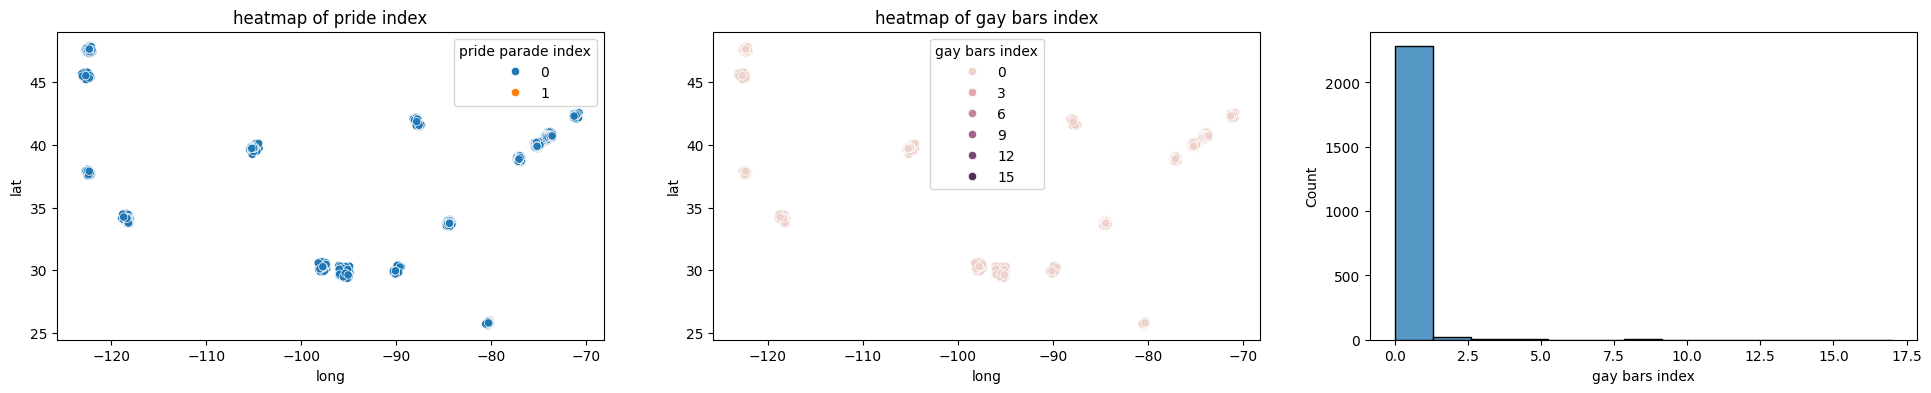

In [11]:
gaydfprideplot = gaydf.copy()

fig, axes = plt.subplots(1, 3, figsize=(24, 4))

plot3 = sns.scatterplot(data=gaydfprideplot, x="long", y="lat", hue="pride parade index", ax=axes[0])
_ = plot3.set(xlabel="long", ylabel="lat", title = "heatmap of pride index")

plot4 = sns.scatterplot(data=gaydfprideplot, x="long", y="lat", hue="gay bars index", ax=axes[1])
_ = plot4.set(xlabel="long", ylabel="lat", title = "heatmap of gay bars index")

plot5 = sns.histplot(gaydfgaybarsplot["gay bars index"], ax=axes[2]) # type: ignore

Looks good, I agree with my old conclusion, but these plots have room for improvement for sure

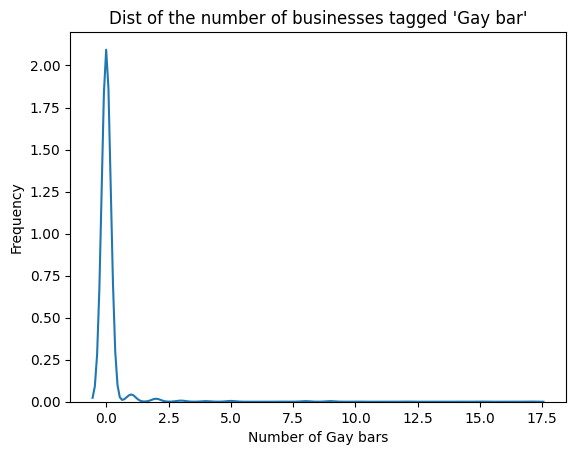

In [32]:
plot5b = sns.kdeplot(data=gaydfgaybarsplot, x="gay bars index")#, kde=True) # type: ignore
_ = plot5b.set(xlabel="Number of Gay bars", ylabel="Frequency", title = "Dist of the number of businesses tagged 'Gay bar'")

Lets do the same for the geo plots

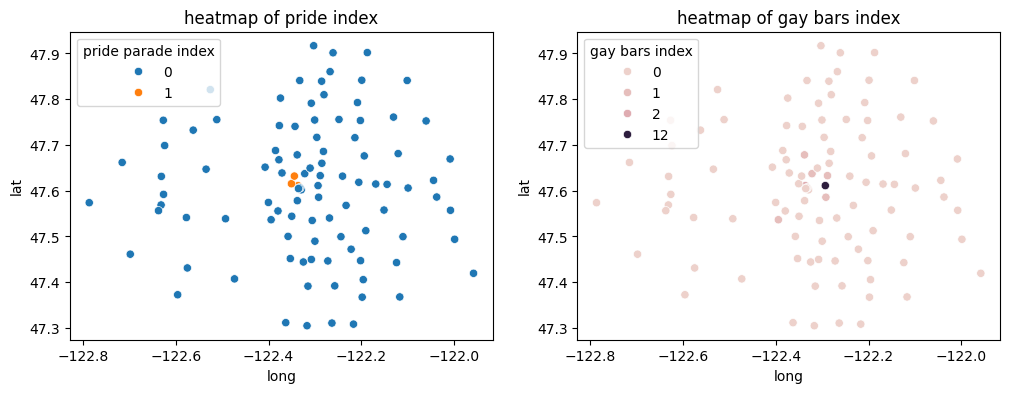

In [40]:
gaydf1city = gaydf.copy()

gaydf1city = gaydf1city[gaydf1city['lat'] >= 46.5].reset_index(drop=True)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

plot3b = sns.scatterplot(data=gaydf1city, x="long", y="lat", hue="pride parade index", ax=axes[0])
_ = plot3b.set(xlabel="long", ylabel="lat", title = "heatmap of pride index")

plot4b = sns.scatterplot(data=gaydf1city, x="long", y="lat", hue="gay bars index", ax=axes[1])
_ = plot4b.set(xlabel="long", ylabel="lat", title = "heatmap of gay bars index")

Lets bring back clusturing

In [52]:
from sklearn.cluster import KMeans

gaydfmap = pd.DataFrame(gaydf)

kmeans = KMeans(n_clusters=15, random_state=42)
kmeans.fit(gaydfmap[['lat', 'long',]])

gaydfmap['cluster'] = kmeans.labels_ + 1; gaydfmap.head(10)

random_words = [      'Washington', 'San Francisco', 'Houston',     'Denver', 'Atlanta', 'Chicago',
    'Philadelphia', 'Seattle', 'Los Angeles',    'Miami', 'Boston', 'New Orleans',   'New York', 'Austin', 'Portland']

cluster_mapping = {i + 1: word for i, word in enumerate(random_words)}

gaydfmap['city'] = gaydfmap['cluster'].map(cluster_mapping)

gaydfmap.head(10)


C:\Users\samia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,pride parade index,gay bars index,lat,long,cluster,city
0,1,15,34.093828,-118.381697,9,Los Angeles
1,0,17,37.758057,-122.435410,3,Houston
2,1,5,40.742039,-74.000620,12,New Orleans
3,1,10,40.734012,-74.006746,12,New Orleans
4,1,9,37.773134,-122.411167,3,Houston
5,1,9,29.967440,-90.064783,11,Boston
6,1,5,38.919144,-77.037381,13,New York
7,0,12,47.611046,-122.293207,6,Chicago
8,1,8,33.799884,-84.385805,5,Atlanta
9,1,2,34.107810,-118.362247,9,Los Angeles


In [ ]:
fig, axes = plt.subplots(15, 2, figsize=(12, 60))

random_words = [      'Washington', 'San Francisco', 'Houston',     'Denver', 'Atlanta', 'Chicago',
    'Philadelphia', 'Seattle', 'Los Angeles',    'Miami', 'Boston', 'New Orleans',   'New York', 'Austin', 'Portland']

# Loop through each city
# for i in range(1, 16):  # i in 1 to 15
#     cluster_data = gaydfmap[gaydfmap['cluster'] == i]
    
for i, city in enumerate(random_words):
    cluster_data = gaydfmap[gaydfmap['city'] == city]
    
    sns.scatterplot(data=cluster_data, x="long", y="lat", hue="pride parade index", ax=axes[i, 0])
    axes[i, 0].set_title(f"Pride Parade Index in {city}"); axes[i, 0].set_xlabel("Longitude"); axes[i, 0].set_ylabel("Latitude")
    
    sns.scatterplot(data=cluster_data, x="long", y="lat", hue="gay bars index", ax=axes[i, 1])
    axes[i, 1].set_title(f"Gay Bars Index in {city}"); axes[i, 1].set_xlabel("Longitude"); axes[i, 1].set_ylabel("Latitude")

plt.tight_layout()
plt.show()

Manifesting, but lets be more readable

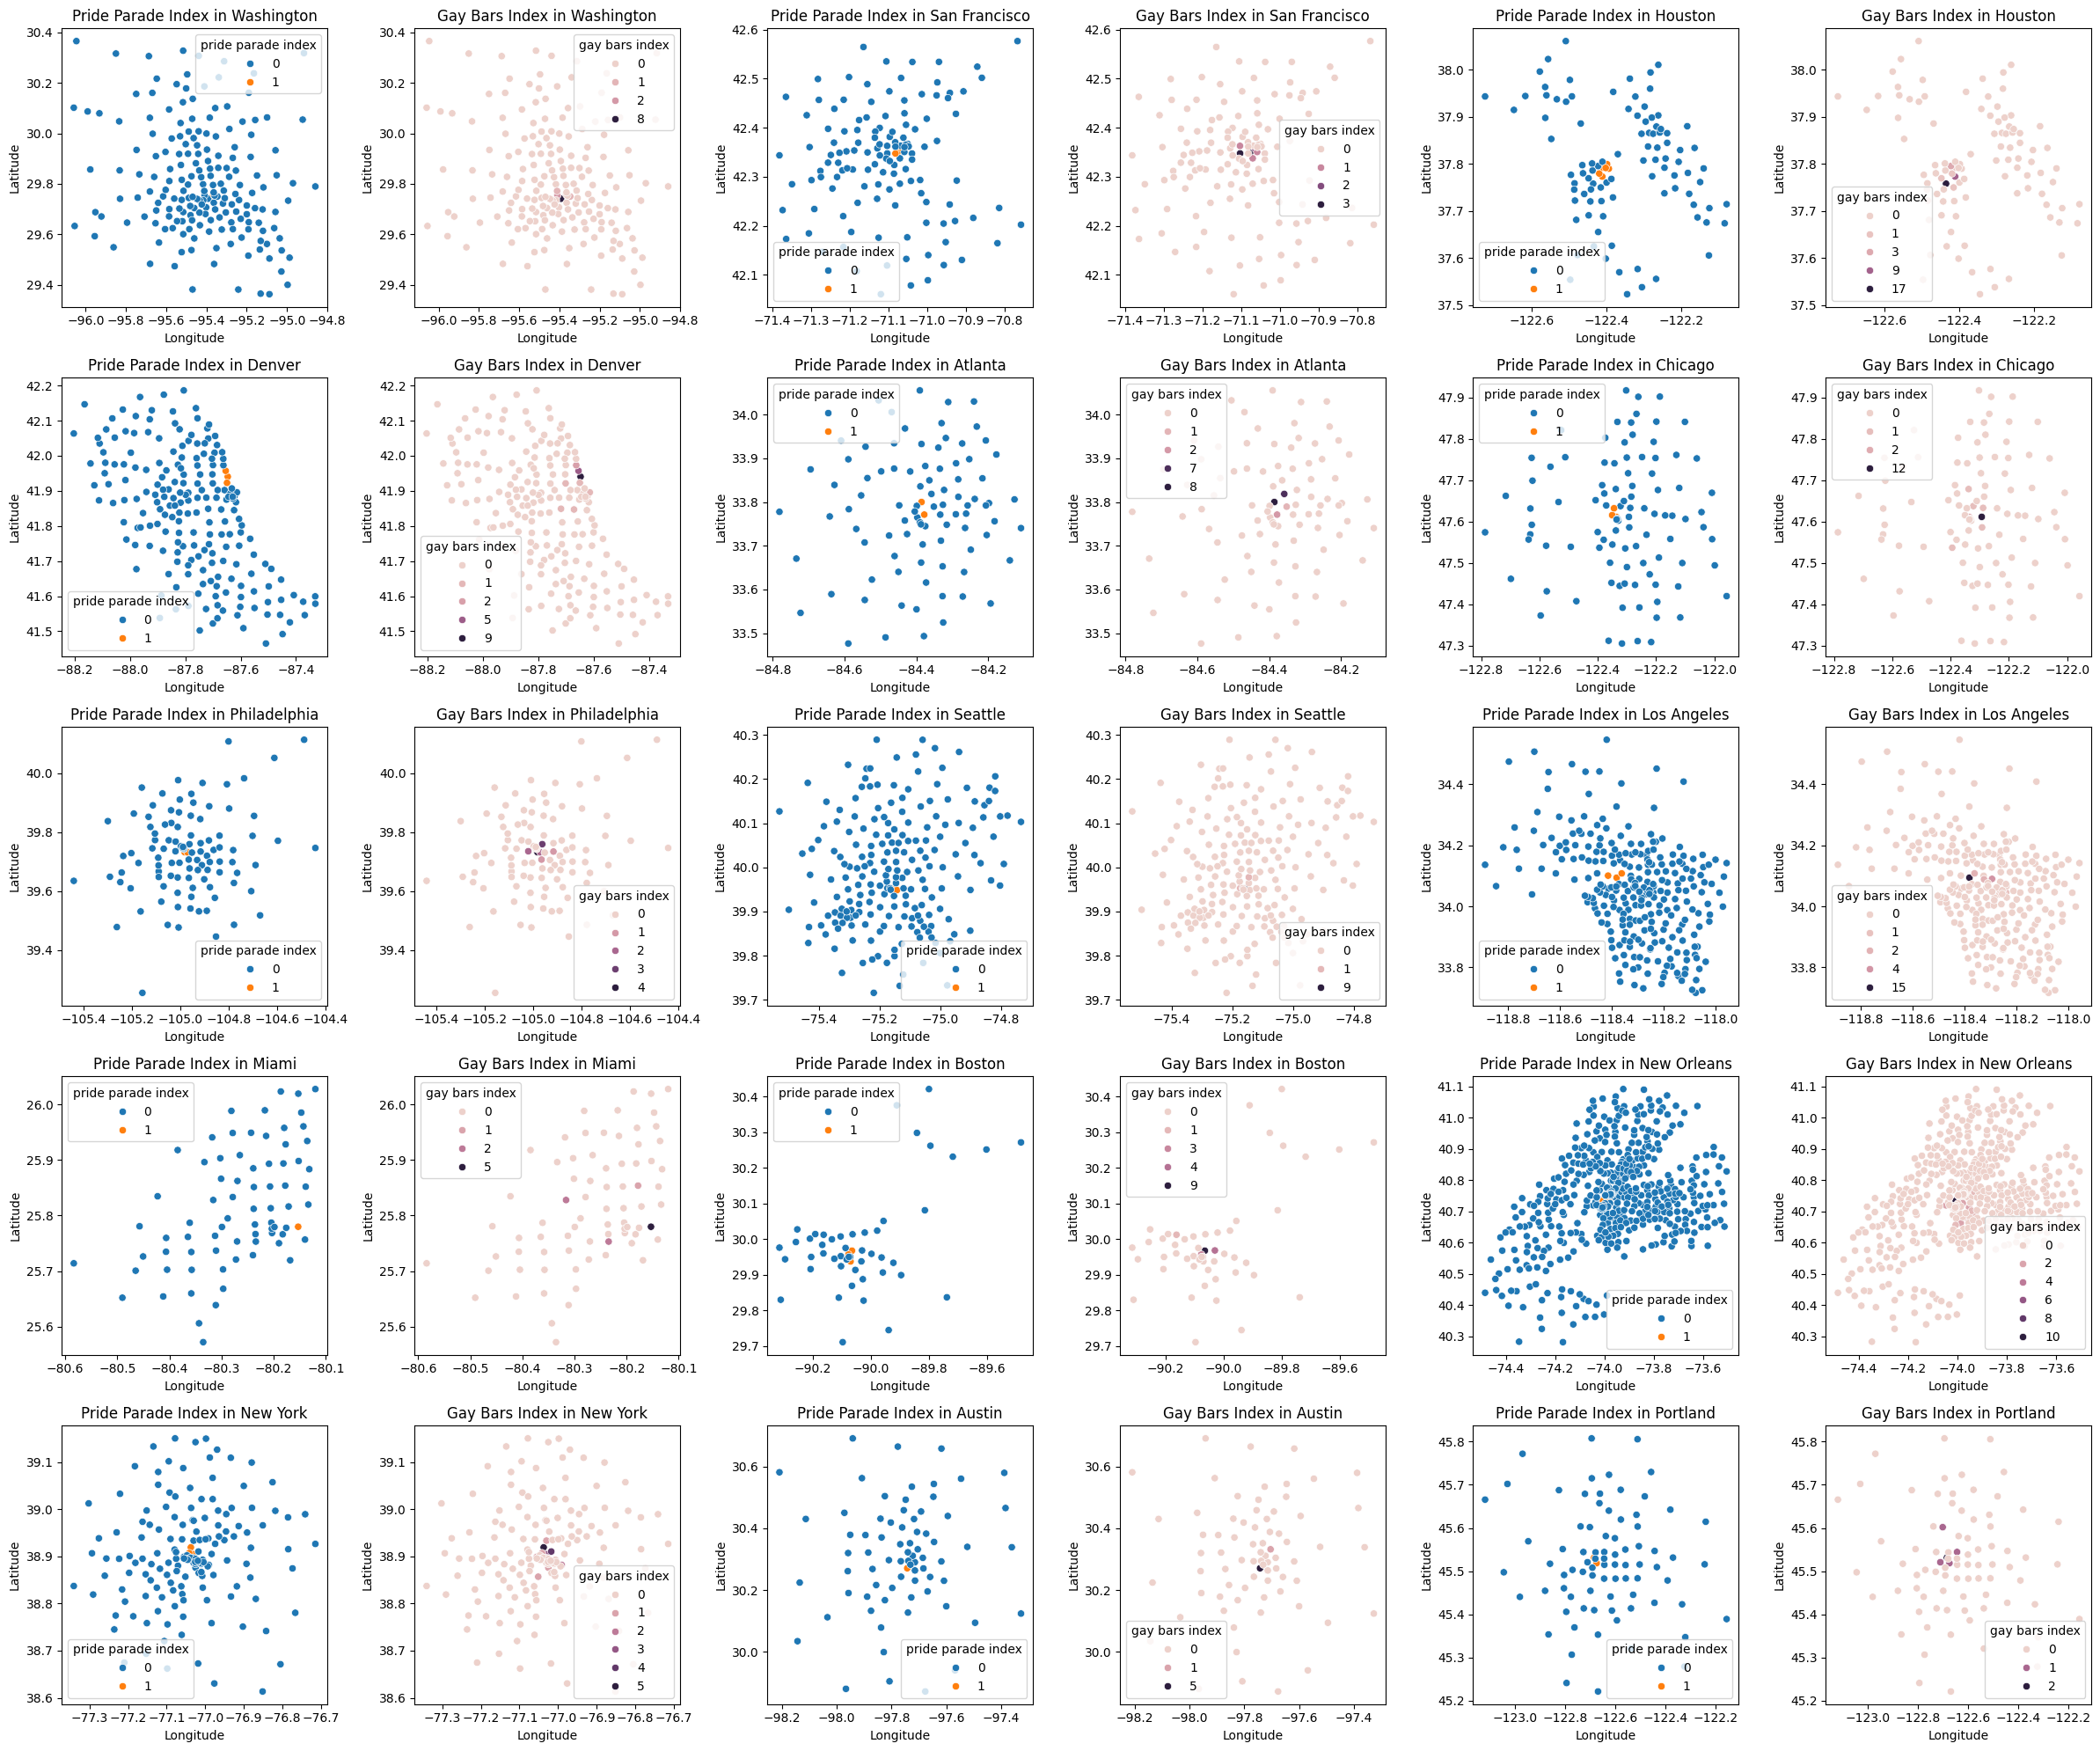

In [63]:
fig, axes = plt.subplots(5, 6, figsize=(24, 20))

random_words = [      'Washington', 'San Francisco', 'Houston',     'Denver', 'Atlanta', 'Chicago',
    'Philadelphia', 'Seattle', 'Los Angeles',    'Miami', 'Boston', 'New Orleans',   'New York', 'Austin', 'Portland']

for i, city in enumerate(random_words):
    cluster_data = gaydfmap[gaydfmap['city'] == city]
    
    sns.scatterplot(data=cluster_data, x="long", y="lat", hue="pride parade index", ax=axes[i // 3, (i % 3) * 2])
    axes[i // 3, (i % 3) * 2].set_title(f"Pride Parade Index in {city}"); axes[i // 3, (i % 3) * 2].set_xlabel("Longitude"); axes[i // 3, (i % 3) * 2].set_ylabel("Latitude")
    
    sns.scatterplot(data=cluster_data, x="long", y="lat", hue="gay bars index", ax=axes[i // 3, (i % 3) * 2 + 1])
    axes[i // 3, (i % 3) * 2 + 1].set_title(f"Gay Bars Index in {city}"); axes[i // 3, (i % 3) * 2 + 1].set_xlabel("Longitude"); axes[i // 3, (i % 3) * 2 + 1].set_ylabel("Latitude")

plt.tight_layout(); plt.show()


Pretty proud of this, lets take a look at the next section of the original

In [ ]:
sns.pairplot(gaydf) #removed un necessary spaghetti code, identical operation

In [ ]:
gaydflight2 = gaydf.copy()

del gaydflight2['lat']; del gaydflight2['long']

sns.pairplot(gaydflight2)

In [ ]:
gaydflight3 = gaydflight2[gaydflight2['gay bars index'] != 0]

sns.pairplot(gaydflight3)

A lot of pointless code that did nothing back there, I see no reason to have any of this, lets move onto the final section

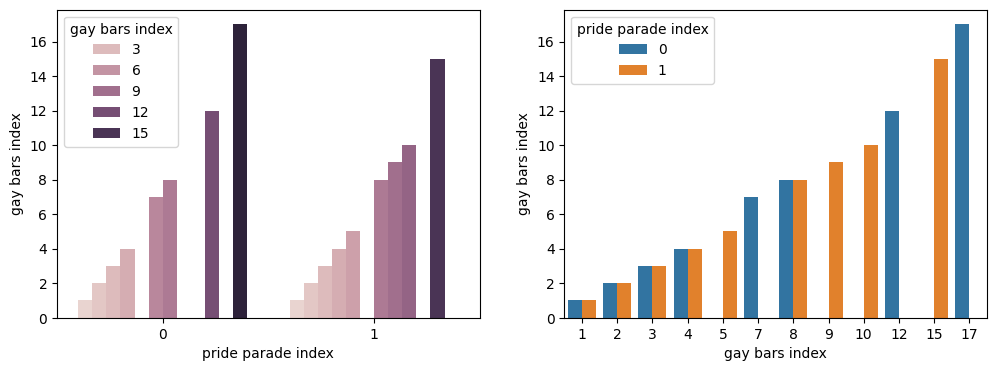

In [76]:
gaydflightparade = gaydflight3[gaydflight3['pride parade index'] != 0]
gaydflightnoparade = gaydflight3[gaydflight3['pride parade index'] != 1]

fig, axes = plt.subplots(1, 2, figsize=(12, 4)) #once again identical in output, but different in process for readabilities sake

g = sns.barplot(
    data=gaydflight3, ax=axes[0],
    x='pride parade index', y='gay bars index', hue='gay bars index'
)

h = sns.barplot(
    data=gaydflight3, ax=axes[1],
    x='gay bars index', y='gay bars index', hue='pride parade index'
)